<a href="https://colab.research.google.com/github/amitmerchant75/pytorch-deep-learning/blob/main/pytorch_workflows_agnostic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
we_are_covering = {1: "data prepare and load",
                   2: "build model",
                   3: "fit the model to data ie training",
                   4: "make predictions and evaluate model",
                   5: "saving and loading a model",
                   6: "putting it all together"}

In [ ]:
#known parameters
weight = 0.7
bias = 0.3

#Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

X[:10], y[:10], len(X), len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 50,
 50)

In [ ]:
train_split = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
X_train, y_train


(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="black", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="pink", s=4, label="Test data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="red", s=4, label="Predictions")

  plt.legend(prop={"size":14});

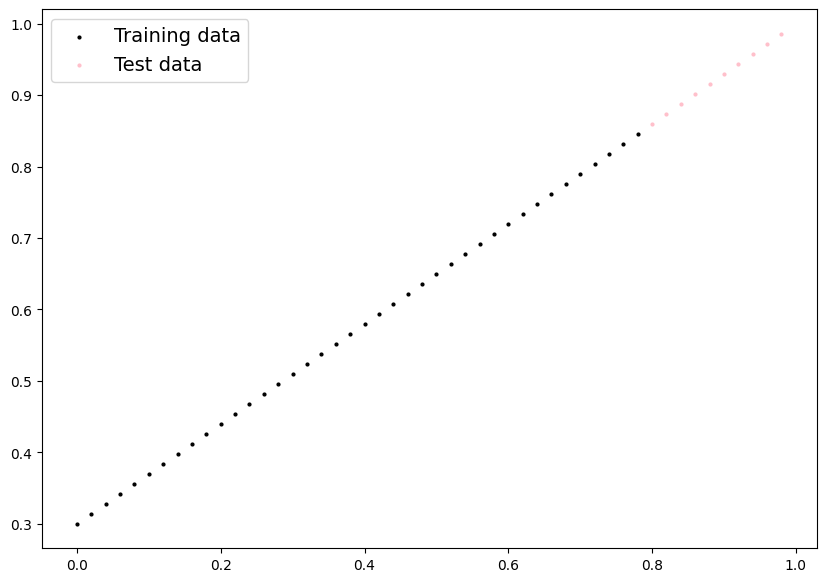

In [ ]:
plot_predictions();

In [ ]:
from torch import nn

class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.Tensor):
    return self.weights * x + self.bias

In [ ]:
torch.manual_seed(42)
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

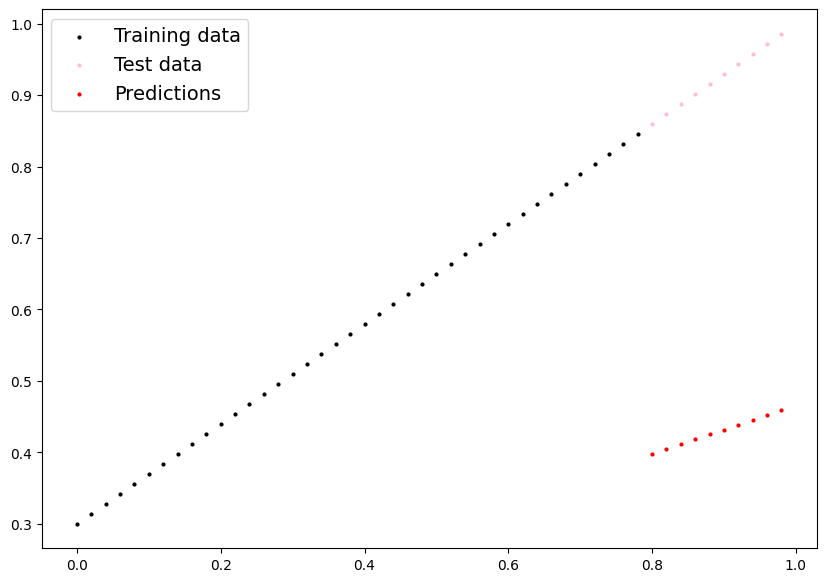

In [ ]:
plot_predictions(predictions=y_preds)

In [ ]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
model_0.state_dict()
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.01)

In [ ]:
torch.manual_seed(42)
epochs = 200

epoch_count = []
loss_values = []
test_loss_values = []

# Training
for epoch in range(epochs):
  model_0.train()

  # Forward pass
  y_pred = model_0(X_train)

  # Loss
  loss = loss_fn(y_pred, y_train)
  # print(f"Loss: {loss}")

  # Optimizer
  optimizer.zero_grad()

  # Perform backpropagation
  loss.backward()

  # Step the optimzier
  optimizer.step()

  # Testing
  model_0.eval()

  with torch.inference_mode():
    # forward pass
    test_pred = model_0(X_test)
    # loss
    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    epoch_count.append(epoch)
    loss_values.append(loss)
    test_loss_values.append(test_loss)
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")
    print(model_0.state_dict())

Epoch: 0 | Loss: 0.31288138031959534 | Test loss: 0.48106518387794495
OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 10 | Loss: 0.1976713240146637 | Test loss: 0.3463551998138428
OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 20 | Loss: 0.08908725529909134 | Test loss: 0.21729660034179688
OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch: 30 | Loss: 0.053148526698350906 | Test loss: 0.14464017748832703
OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch: 40 | Loss: 0.04543796554207802 | Test loss: 0.11360953003168106
OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch: 50 | Loss: 0.04167863354086876 | Test loss: 0.09919948130846024
OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch: 60 | Loss: 0.03818932920694351 | Test loss: 0.08886633068323135
OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788

In [ ]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.5784])), ('bias', tensor([0.3513]))])

In [ ]:
with torch.inference_mode():
  y_preds_new = model_0(X_test)

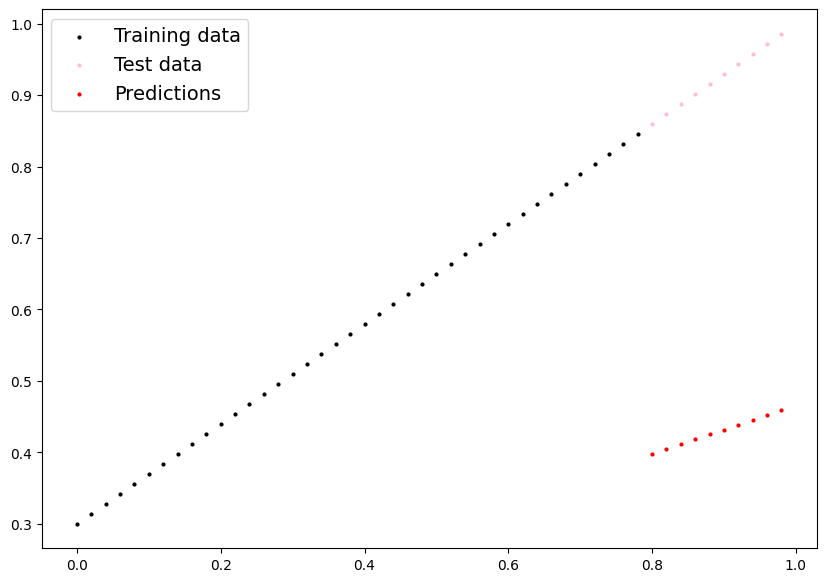

In [ ]:
plot_predictions(predictions=y_preds)

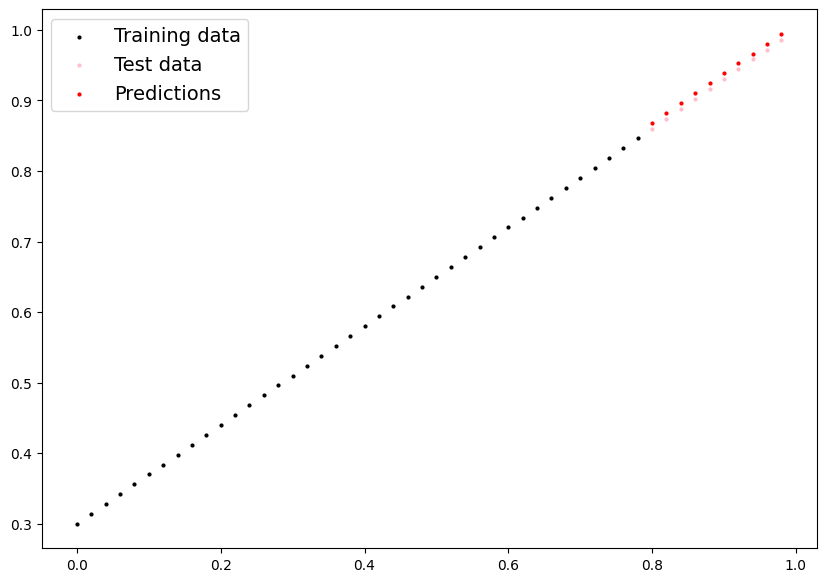

In [ ]:
plot_predictions(predictions=y_preds_new)

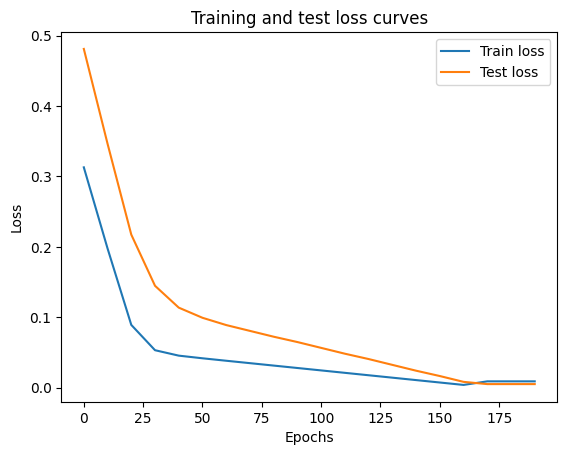

In [ ]:
import numpy as np
plt.plot(epoch_count, np.array(torch.tensor(loss_values).numpy()), label="Train loss")
plt.plot(epoch_count, test_loss_values, label="Test loss")
plt.title("Training and test loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend()

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME ="01_pytorch_workflow.pth"
MODEL_SAVE_PATH  = MODEL_PATH / MODEL_NAME

print(f"Saving Model to {MODEL_SAVE_PATH}")
torch.save(obj=model_0.state_dict(), f=MODEL_SAVE_PATH)

# torch.load()
# torch.nn.Module.load_state_dict()

Saving Model to models/01_pytorch_workflow.pth


In [ ]:
ls -l models

total 4
-rw-r--r-- 1 root root 2208 Mar 25 13:30 01_pytorch_workflow.pth


In [ ]:
loaded_model_0 = LinearRegressionModel()
loaded_model_0.state_dict()



OrderedDict([('weights', tensor([-0.9890])), ('bias', tensor([0.9580]))])

In [ ]:
loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [ ]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
loaded_model_0.eval()
with torch.inference_mode():
  loaded_model_preds = loaded_model_0(X_test)

loaded_model_preds

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
y_preds_new == loaded_model_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [2]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

#setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using device: {device}")

Using device: cuda


Data



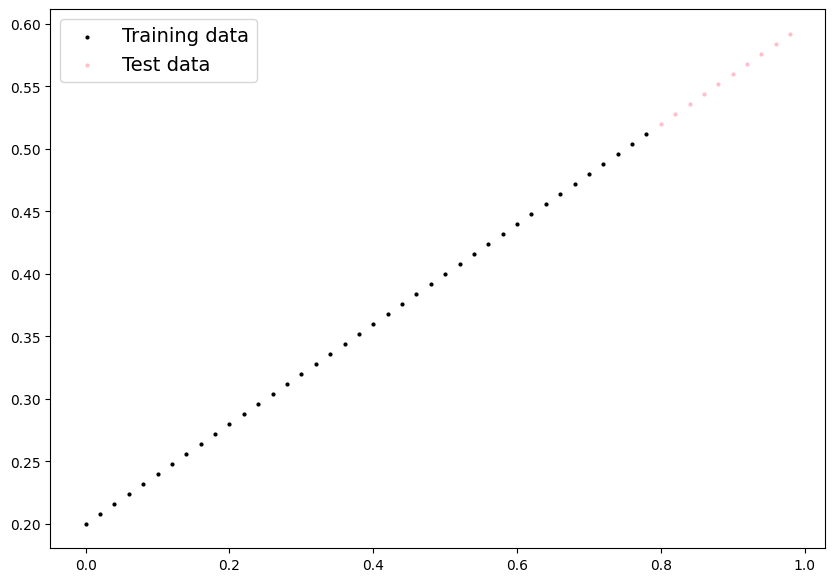

In [3]:
weight = 0.4
bias = 0.2

start = 0
end = 1
step = 0.02

# unsqueeze required to reduce errors
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias

#split data
train_split  = int(0.8 * len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]
len(X_train), len(y_train), len(X_test), len(y_test)

def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))
  plt.scatter(train_data, train_labels, c="black", s=4, label="Training data")
  plt.scatter(test_data, test_labels, c="pink", s=4, label="Test data")

  if predictions is not None:
    plt.scatter(test_data, predictions, c="red", s=4, label="Predictions")

  plt.legend(prop={"size":14});

plot_predictions(X_train, y_train, X_test, y_test)

In [14]:
# Train the model
class LinearRegressionModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    # Use nn.Linear() to create variables
    self.linear_layer = nn.Linear(in_features=1, out_features=1)

  def forward(self,x: torch.Tensor):
    return self.linear_layer(x)

# Set manual see for reproducibility
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

# Set the model to use the traget device
next(model_1.parameters()).device

model_1.to(device)
next(model_1.parameters()).device

# Loss function, same as MAE
loss_fn = nn.L1Loss()

# Opimizer, stochastic gradient descent
optimizer = torch.optim.SGD(params=model_1.parameters(), lr = 0.01)

# Training loop
torch.manual_seed(42)
epochs = 200

#Put data on target device
X_train = X_train.to(device)
y_train = y_train.to(device)
X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
  model_1.train()

  #1 forward pass
  y_pred = model_1(X_train)

  #2 losss
  loss = loss_fn(y_pred, y_train)

  #3 Zero the gradient
  optimizer.zero_grad()

  #4 backpropagation
  loss.backward()

  #5 optimizer
  optimizer.step()

  #testing
  model_1.eval()
  with torch.inference_mode():
    test_pred = model_1(X_test)

    test_loss = loss_fn(test_pred, y_test)

  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss} | Test loss: {test_loss}")

# Testing loop

Epoch: 0 | Loss: 0.7721779942512512 | Test loss: 0.9409762620925903
Epoch: 10 | Loss: 0.6569680571556091 | Test loss: 0.8062664270401001
Epoch: 20 | Loss: 0.5417582392692566 | Test loss: 0.6715565919876099
Epoch: 30 | Loss: 0.4265483021736145 | Test loss: 0.5368467569351196
Epoch: 40 | Loss: 0.3113384246826172 | Test loss: 0.402136892080307
Epoch: 50 | Loss: 0.19612857699394226 | Test loss: 0.2674270570278168
Epoch: 60 | Loss: 0.08091866970062256 | Test loss: 0.13271720707416534
Epoch: 70 | Loss: 0.01928839646279812 | Test loss: 0.047784872353076935
Epoch: 80 | Loss: 0.015457023866474628 | Test loss: 0.03542662784457207
Epoch: 90 | Loss: 0.01201879233121872 | Test loss: 0.027154160663485527
Epoch: 100 | Loss: 0.008583522401750088 | Test loss: 0.019568556919693947
Epoch: 110 | Loss: 0.005153974052518606 | Test loss: 0.01129607018083334
Epoch: 120 | Loss: 0.0021402728743851185 | Test loss: 0.008357048034667969
Epoch: 130 | Loss: 0.007573361974209547 | Test loss: 0.008357048034667969
Epoc

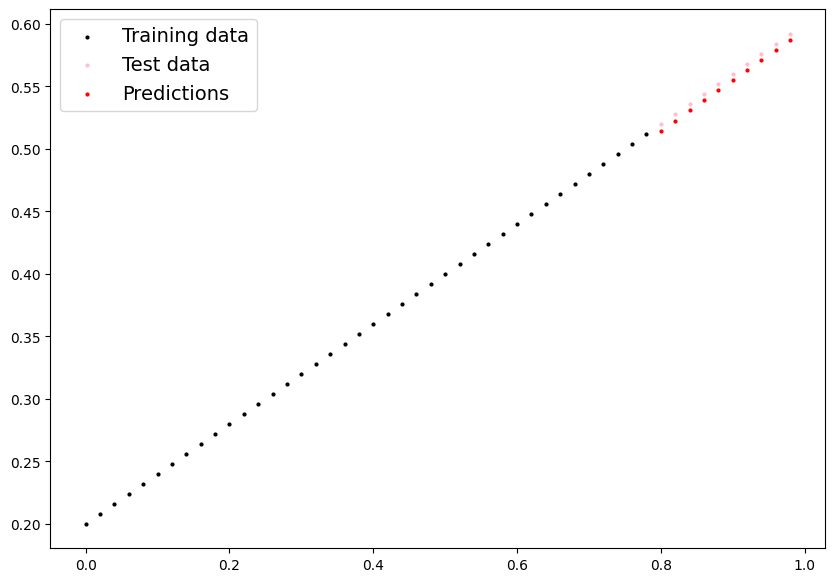

In [15]:
model_1.state_dict()

model_1.eval()

with torch.inference_mode():
  y_preds = model_1(X_test)
y_preds

# data needs to be on cpu to use numpy
plot_predictions(predictions=y_preds.cpu())

In [18]:
#Save

from pathlib import Path

#create model directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_1.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
MODEL_SAVE_PATH

#save dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save( obj=model_1.state_dict(), f=MODEL_SAVE_PATH )

Saving model to: models/01_pytorch_workflow_model_1.pth


In [23]:
#Load

loaded_model_1 = LinearRegressionModelV2()
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)

next(loaded_model_1.parameters()).device

loaded_model_1.state_dict()

# evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
  loaded_model_1_preds = loaded_model_1(X_test)
y_preds == loaded_model_1_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')